In [1]:
import numpy as np;
import matplotlib.pyplot as plt;
import cv2;
import math;

import keras;
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array;
from keras.models import Sequential;
from keras.layers import Conv2D,MaxPooling2D,UpSampling2D,Flatten,Dropout,Dense,BatchNormalization,Reshape;

In [2]:
def diff(a,b):
    c=np.zeros(a.shape);
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            c[i][j]=(1+a[i][j]-b[i][j])/2;
    return(c);

In [3]:
def reform(a,c):
    b=np.zeros(a.shape);
    for i in range(a.shape[0]):
        for j in range(a.shape[1]):
            b[i][j]=(1+a[i][j])-2*c[i][j];
    return(b);

In [4]:
import os

x_train=[]
y_train=[]
x_test=[]
y_test=[]

path_train_low='../dataSets/ref/our485/low/'
path_train_high='../dataSets/ref/our485/high/'
path_test_low='../dataSets/ref/eval15/low/'
path_test_high='../dataSets/ref/eval15/high/'

print('\nLoding Train dataset :')
i=0;
for img in os.listdir(path_train_low):
    img_low_path=os.path.join(path_train_low, img);
    img_high_path=os.path.join(path_train_high, img);
    
    img_low=load_img(img_low_path, target_size=(64,64));
    img_low=img_to_array(img_low)/255.;
    
    img_high=load_img(img_high_path, target_size=(64,64));
    img_high=img_to_array(img_high)/255.;
        
    Rl,Gl,Bl=cv2.split(img_low);
    Rh,Gh,Bh=cv2.split(img_high);

    Rd=diff(Rl,Rh);
    Gd=diff(Gl,Gh);
    Bd=diff(Bl,Bh);
    img_diff=cv2.merge((Rd,Gd,Bd));
    
    x_train.append(img_low);
    y_train.append(img_diff);
    
    i=i+1;
    print("{:.2f}".format(i/4.89)+' %',end='\r');

print('\nLoding Test dataset :')
i=0;
for img in os.listdir(path_test_low):
    img_low_path=os.path.join(path_test_low, img);
    img_high_path=os.path.join(path_test_high, img);
    
    img_low=load_img(img_low_path, target_size=(64,64));
    img_low=img_to_array(img_low)/255.;
    
    img_high=load_img(img_high_path, target_size=(64,64));
    img_high=img_to_array(img_high)/255.;
        
    Rl,Gl,Bl=cv2.split(img_low);
    Rh,Gh,Bh=cv2.split(img_high);
    
    Rd=diff(Rl,Rh);
    Gd=diff(Gl,Gh);
    Bd=diff(Bl,Bh);
    img_diff=cv2.merge((Rd,Gd,Bd));
    
    x_test.append(img_low);
    y_test.append(img_diff);
    
    i=i+1;
    print("{:.2f}".format(i/0.14)+' %',end='\r');

x_train=np.array(x_train, dtype="float32");
y_train=np.array(y_train, dtype="float32");

x_test=np.array(x_test, dtype="float32");
y_test=np.array(y_test, dtype="float32");


Loding Train dataset :
100.00 %
Loding Test dataset :


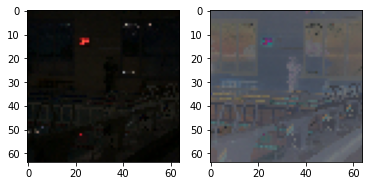

In [10]:
fig=plt.figure()

f=fig.add_subplot(1,2,1)
s=fig.add_subplot(1,2,2)

f.imshow(x_test[10])
s.imshow(y_test[10])

In [7]:
img_low=np.array(x_test[2]);
img_high=np.array(y_test[2]);
Rl,Gl,Bl=cv2.split(img_low);
Rh,Gh,Bh=cv2.split(img_high);

Rd=diff(Rl,Rh);
Gd=diff(Gl,Gh);
Bd=diff(Bl,Bh);

Rf=reform(Rl,Rd);
Gf=reform(Gl,Gd);
Bf=reform(Bl,Bd);

img_diff=cv2.merge((Rd,Gd,Bd));
img_reform=cv2.merge((Rf,Gf,Bf));

plt.imshow(img_diff)

plt.imshow(img_reform)